Imports

In [1]:
%matplotlib inline
import torch
from tqdm.notebook import tqdm as tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

from HGNN.train.configParser import ConfigParser
from myhelpers import config_plots, TrialStatistics
from HGNN.train import CNN, dataLoader
# config_plots.global_settings()

experimetnsFileName = "experiments.csv"

Parameters

In [2]:
experimentsPath="/home/elhamod/HGNN/experiments/"
dataPath="/data/BGNN_data/"
experimentName="biology_paper_augmentation_effect"
trial_hash="8f4c827179c7284f264c3da790cbe741cb17f91416b995aafedd7720"

cuda=6

plotsToDisplay= [{
    'validation_fine_f1': {"label":"Validation f1" ,"secondary":False},
    'validation_loss': {"label":"Validation loss","secondary":True},
    'training_fine_f1': {"label":"training f1" ,"secondary":False},
#     'test_fine_f1': {"label":"test f1" ,"secondary":False},
    'validation_coarse_f1': {"label":"val coarse f1" ,"secondary":False},
#     'training_loss': {"label":"training loss","secondary":True}
}]

Cuda

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 6


Get experiment parameters and model

In [4]:
# Get experiment parameters
experimentsFileNameAndPath = os.path.join(experimentsPath, experimetnsFileName)
if os.path.exists(experimentsFileNameAndPath):
    experiments_df = pd.read_csv(experimentsFileNameAndPath)
else:
    raise Exception("Experiment not " + trial_hash + " found!")
experimentRecord = experiments_df[experiments_df["trialHash"] == trial_hash]
experiment_params = experimentRecord.to_dict('records')[0]
print(experiment_params)

# Create the model
# config_parser = ConfigParser(experimentsPath, dataPath, experimentName)
experimentPathAndName = os.path.join(experimentsPath, experimentName)
# datasetManager = dataLoader.datasetManager(experimentPathAndName,dataPath)
# datasetManager.updateParams(config_parser.fixPaths(experiment_params))
# dataset = datasetManager.getDataset()
# fineList = dataset.csv_processor.getFineList()
# coarseList = dataset.csv_processor.getCoarseList()
# numberOffine = len(fineList)
# numberOfcoarse = len(coarseList)
# architecture = {
#     "fine": numberOffine,
#     "coarse" : numberOfcoarse
# }
# model = CNN.create_model(architecture, experiment_params)

# get the model and the parameters
modelName = experimentRecord.iloc[0]["modelName"]
trialName = os.path.join(experimentPathAndName, modelName)
# df, epochs, time_elapsed = CNN.loadModel(model, trialName)

# get stats
df = pd.read_csv(os.path.join(trialName, 'stats.csv'))

{'experimentName': 'biology_paper_augmentation_effect', 'modelName': 'models/8f4c827179c7284f264c3da790cbe741cb17f91416b995aafedd7720', 'datasetName': 'datasplits/b4896471167c5599680115e51349929def797e403bead8f0fe554d79', 'experimentHash': '091351b87556c0d52115d41316e73819c38ea32f4790877f20fc5137', 'trialHash': '8f4c827179c7284f264c3da790cbe741cb17f91416b995aafedd7720', 'image_path': 'INHS_cropped', 'suffix': 'biology_paper_200max', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 128, 'n_epochs': 500, 'learning_rate': 5e-05, 'numOfTrials': 3, 'patience': 10, 'fc_width': 200, 'fc_layers': 1, 'modelType': 'BB', 'lambda': 0.6, 'unsupervisedOnTest': False, 'tl_model': 'ResNet18', 'augmented': True, 'weight_decay': 0.0001, 'img_res': 448, 'tl_freeze': False, 'cnn_layers': 0, 'cnn_channels': 128, 'pretrained': True, 'two_nets': True, 'link_layer': 'layer3', 'dataset_norm': True, 'aug_profile': 'withRotation_PCA1.5'}


Plot progress

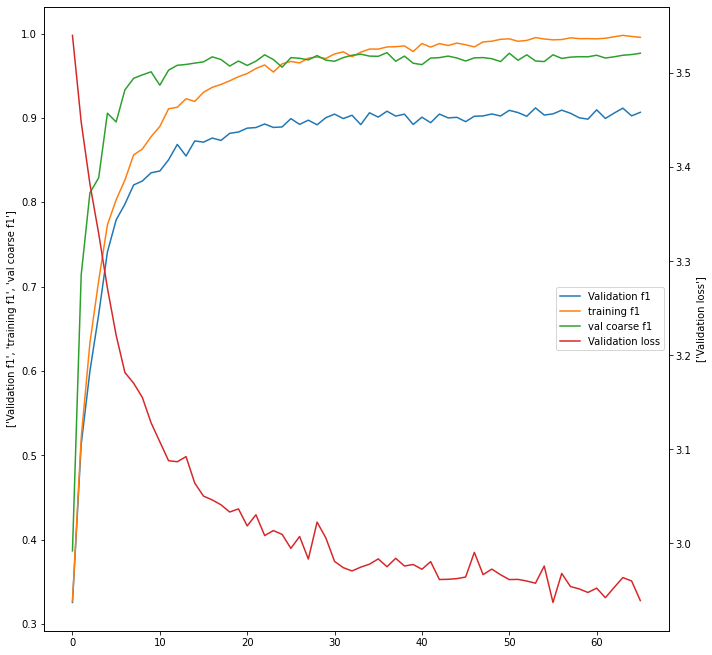

In [5]:
for plotToDisplay in plotsToDisplay:
    fig,ax = plt.subplots(figsize=(10, 10))
    
    for key in plotToDisplay:
        df = df.rename(columns={key: plotToDisplay[key]['label']})

    
    y_primary=[]
    y_secondary=[]
    for key in plotToDisplay:
        if plotToDisplay[key]["secondary"]:
            y_secondary.append(key) # 
        else:
            y_primary.append(key)
    
    y_primary_labels = list(map(lambda x: plotToDisplay[x]["label"], y_primary))
    y_secondary_labels = list(map(lambda x: plotToDisplay[x]["label"], y_secondary))
    df_cleaned = df[(y_secondary_labels + y_primary_labels)]
    
    lines = []
    if len(y_primary_labels) > 0:
        df_cleaned.plot(ax=ax, y=y_primary_labels)
        ax.set_ylabel(str(y_primary_labels))
        lines = ax.get_lines()
    if len(y_secondary_labels) > 0:
        df_cleaned.plot(ax=ax, y=y_secondary_labels, secondary_y=True)
        ax.right_ax.set_ylabel(str(y_secondary_labels))
        lines = lines+ ax.right_ax.get_lines()
    
    ax.legend(lines, [l.get_label() for l in lines], loc='center right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig(os.path.join(trialName, 'training_plot_'+hashlib.sha224(str(plotsToDisplay).encode('utf-8')).hexdigest()+'.jpg'))